Here we will be doing following things 

1.Importing data

2.Data Vizualization 

3.Feature Engineering 

4.Model Built 

5.Model Optimization using Grid Search

6.Balancing Machine Learning

If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# 1.Data Import and Exploration

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
import warnings
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


****Data contains following information

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

### Shape of the data

In [4]:
df.shape

(303, 14)

So our data has 303 rows and 14 features

### Missing Values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We are very lucky here there are no Null Values in the dataset.But in this data the missing values are present in the form of value ZERO. Our next task would be to find out numbers of ZEROS in each column.

### Finding out Null Values which are represented by ZERO (0)

In [6]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
print("# Rows in the dataset {0}".format(len(df)))
print("---------------------------------------------------")
for col in cols:
    print("# Rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] ==0]),col))

# Rows in the dataset 303
---------------------------------------------------
# Rows in age with ZERO value: 0
# Rows in sex with ZERO value: 96
# Rows in cp with ZERO value: 143
# Rows in trestbps with ZERO value: 0
# Rows in chol with ZERO value: 0
# Rows in fbs with ZERO value: 258
# Rows in restecg with ZERO value: 147
# Rows in thalach with ZERO value: 0
# Rows in exang with ZERO value: 204
# Rows in oldpeak with ZERO value: 99
# Rows in slope with ZERO value: 21
# Rows in ca with ZERO value: 175
# Rows in thal with ZERO value: 2
# Rows in target with ZERO value: 138


The columns which have categorical values can have ZERO values.But columns like cp,trestbps,chol,fbs,exang,oldpean and Slope should not have value ZERO.The presence of ZERO in this columns indicate the presence of null values.

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As all the columns are either integer or float there is no need to convert categorical values numeric values.

# 2.Data Vizualization

### Corelation Matrix

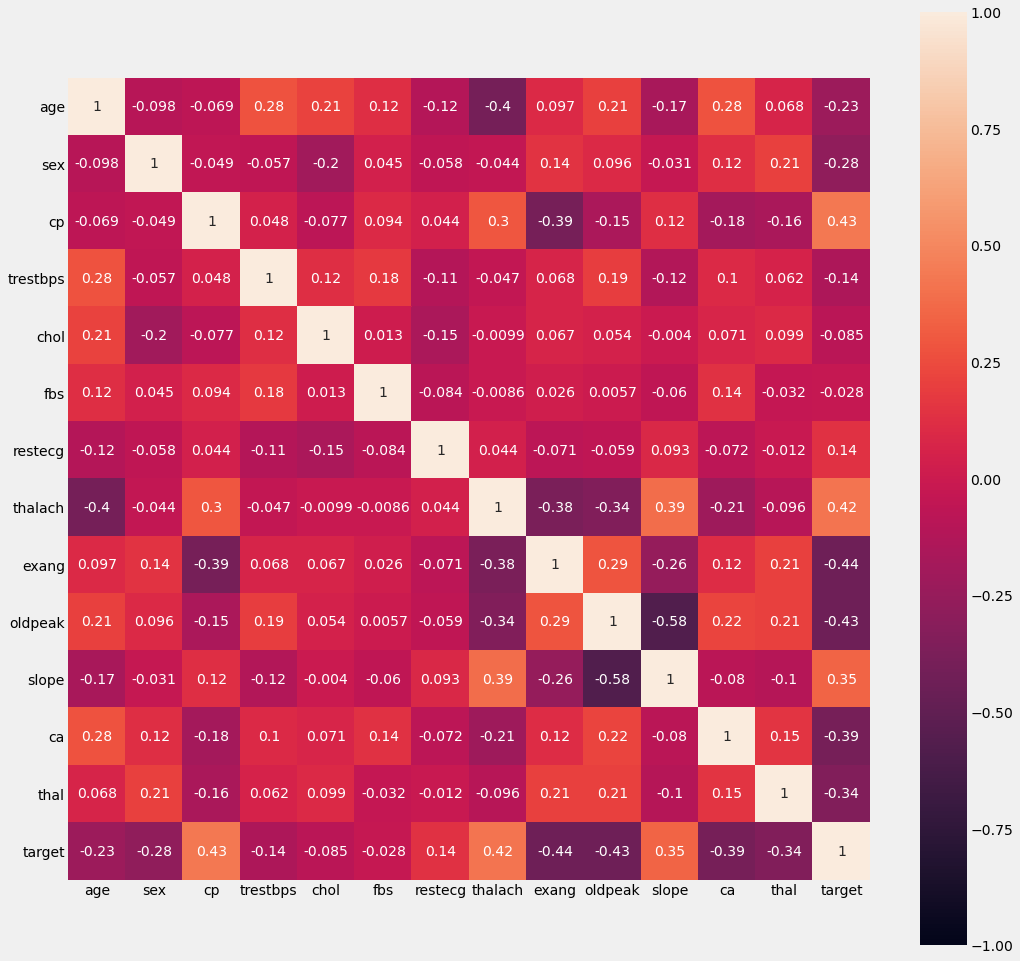

In [9]:
corrmat = df.corr()
fig = plt.figure(figsize = (16,16))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

We can see that there is not much correlation between the features in the dataset.If corelation was high we can face issue of multicollinearity.In that case we would need to use feature engineering to avoid multi colinearity.

### Histogram

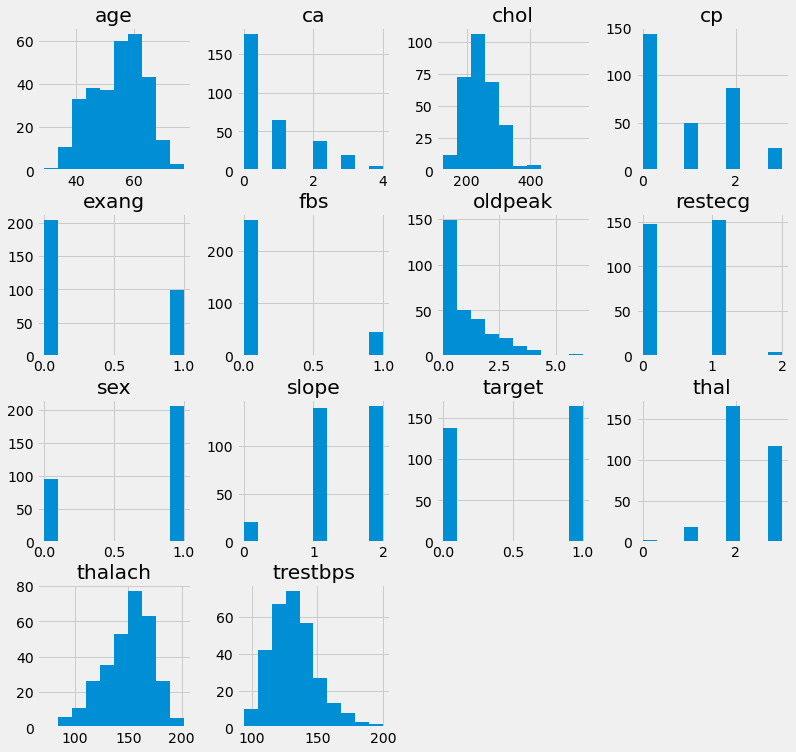

In [10]:
df.hist(figsize = (12,12))
plt.show()

Histogram clearly shows us that ca,cp,exang,fbs,restecg,sex,slope,target and thal are categorical data.Other columns are numerical features.

### Effect of Sex

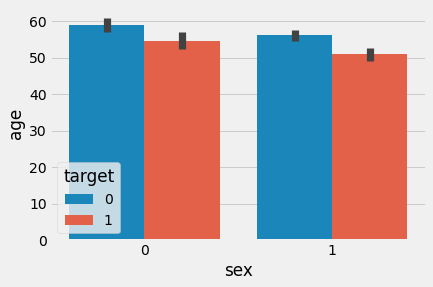

In [11]:
sns.barplot(x="sex",y ='age',hue ='target',data=df)
pass

From the above plot we can say that men have heart disease at lower age compared to women.

# TSNE for Dimentionality Reduction

In [12]:
X = df.drop('target',axis =1)
from sklearn.manifold import TSNE
import time 
time_start = time.time()
df_tsne = TSNE(random_state =10).fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.7483067512512207 seconds


In [13]:
#df_tsne

In [14]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x,colors):
    # Choosing a color palette with seaborn 
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("deep",num_classes))
    
    # Create a scatter plot
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0],x[:,1],lw=0,s=40,c=palette[colors.astype(np.int)])
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    ax.axis('off')
    ax.axis('tight')
    
    #add the label for each digit corresponding to label 
    txts = []
    
    for i in range(num_classes):
        
        # Position of each label at median of data points
        
        xtext, ytext = np.median(x[colors== i,:],axis = 0)
        txt = ax.text(xtext, ytext,str(i),fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5,foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f,ax,sc,txts
        

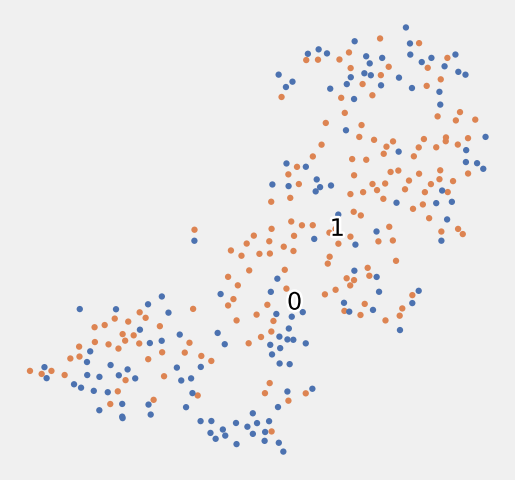

In [15]:
fashion_scatter(df_tsne,df.target)
pass

We can see that after applying TSNE we dont get a clear separation in the target variable.As separation of the target is low we have a possibility of low accuarcy while predicting.

# 3.Feature Engineering

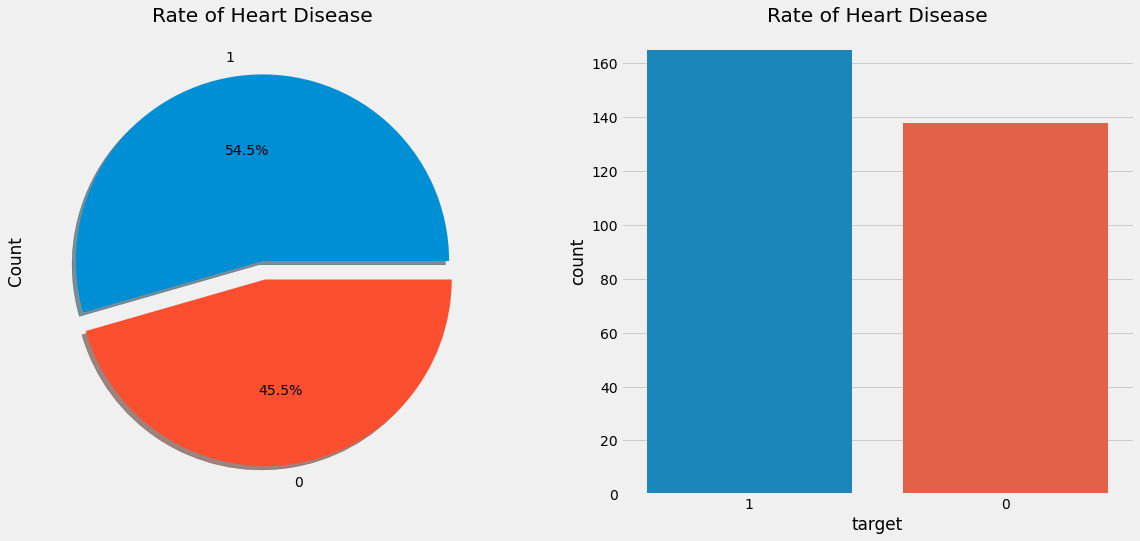

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Rate of Heart Disease')
ax[0].set_ylabel('Count')
sns.countplot('target',data=df,ax=ax[1],order=df['sex'].value_counts().index)
ax[1].set_title('Rate of Heart Disease')
plt.show()

We can see that the data is slightly unbalanced.But we will go ahead with the same data as the level of unbalance is low.

### Creating the Matrix of features

In [17]:
final_cols = cols
final_cols = list(final_cols)
final_cols.remove('ca')
final_cols.remove('cp')
final_cols.remove('exang')
final_cols.remove('fbs')
final_cols.remove('restecg')
final_cols.remove('sex')
final_cols.remove('slope')
final_cols.remove('target')
final_cols.remove('thal')
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We have dropped the columns with categorical columns.This is because when we do feature engineering we will be repacing the numerical column Zero values with the mean values.This is not needed for the columns with categorical variables.

In [18]:
X = df.drop('target',axis=1) #predictor feature columns
y = df.target

### Test Train Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))

Training Set: 272
Test Set: 31
Training labels: 272
Test labels: 31


### Replacing Zeros with Mean

In [20]:
from sklearn.impute import SimpleImputer 
fill = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])

# 4.Model Build and Evaluation

In [21]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test,pred)
    print(pred)
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n',cm)

### Logistic Regression 

In [22]:
# Creating Regularization penalty
penalty = ['l1','l2']

# Create regularization hyperparameter space 
C = np.logspace(0,4,10)

# Create hyperparameter options 
hyperparameters = dict(C=C,penalty = penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s


[0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1]
Best Params : {'C': 1.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.71      0.77      0.74        13

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.78      0.77      0.78        31

Accuracy Score :0.7741935483870968
Confusion Matrix : 
 [[14  4]
 [ 3 10]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


### XGBoost

In [23]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
           'learning_rate':np.arange(0.01,0.1,0.01).tolist()
         }
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.6min


[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1]
Best Params : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.75      0.92      0.83        13

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31

Accuracy Score :0.8387096774193549
Confusion Matrix : 
 [[14  4]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.8min finished


### Random Forest

In [24]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
        
         }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'max_depth': 4, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.73      0.85      0.79        13

    accuracy                           0.81        31
   macro avg       0.80      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31

Accuracy Score :0.8064516129032258
Confusion Matrix : 
 [[14  4]
 [ 2 11]]


### SVC

In [25]:
param = {
           'C':[0.1,1,100,1000],
           'gamma':[0.0001,0.001,0.005,0.1,1,3,5],
           
         }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.67      0.77        18
           1       0.67      0.92      0.77        13

    accuracy                           0.77        31
   macro avg       0.79      0.79      0.77        31
weighted avg       0.82      0.77      0.77        31

Accuracy Score :0.7741935483870968
Confusion Matrix : 
 [[12  6]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished


Support Vector machines need big data set to have higher accuracy.Here we have less number of data points so accuracy would be comparatively low.

# 6.Balancing the dataset

In [26]:
X = df.drop('target',axis=1)
y = df.target
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()

1    165
0    165
Name: target, dtype: int64

We have balance the dataset

In [28]:
print(cols)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


We need to convert the numpy array into dataframe

In [29]:
X_res_OS = pd.DataFrame(X_res_OS,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
Y_res_OS = pd.DataFrame(Y_res_OS,columns=['target'])

### Test Train Split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS,test_size = 0.1,random_state=10)
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test labels :',len(y_test))


Training Set : 297
Test Set : 33
Training labels : 297
Test labels : 33


In [31]:
print(final_cols)
type(X_train)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


pandas.core.frame.DataFrame

In [32]:
from sklearn.impute import SimpleImputer 
fill = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])

# 7. Refitting the Model 

### XGBoost

In [33]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
           'learning_rate':np.arange(0.01,0.1,0.01).tolist()
         }
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1343 out of 1350 | elapsed:  1.8min remaining:    0.6s


[1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
Best Params : {'learning_rate': 0.06999999999999999, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.83      0.75      0.79        20

    accuracy                           0.76        33
   macro avg       0.75      0.76      0.75        33
weighted avg       0.77      0.76      0.76        33

Accuracy Score :0.7575757575757576
Confusion Matrix : 
 [[10  3]
 [ 5 15]]


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.8min finished
